In [1]:
!pip install tqdm psutil

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import psutil

# MNIST 데이터셋 로드 및 전처리
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Transformer 모델 정의
class TransformerModel(nn.Module):
    def __init__(self, input_dim, model_dim, num_classes, num_heads, num_layers, dropout=0.1):
        super(TransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, model_dim)
        encoder_layer = nn.TransformerEncoderLayer(d_model=model_dim, nhead=num_heads, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(model_dim, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = self.embedding(x).unsqueeze(1)  # Add sequence dimension
        x = self.transformer_encoder(x)
        x = x.mean(dim=1)  # Pooling: average over sequence dimension
        x = self.fc(x)
        return x

# 하이퍼파라미터 설정
input_dim = 28 * 28  # MNIST 이미지 크기 (28x28)
model_dim = 128
num_classes = 10
num_heads = 4
num_layers = 2
num_epochs = 20
learning_rate = 0.001

# 모델, 손실 함수 및 옵티마이저 초기화
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TransformerModel(input_dim, model_dim, num_classes, num_heads, num_layers).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 학습 및 검증
train_losses = []
val_losses = []
val_accuracies = []
epoch_times = []
memory_usages = []
overfitting_indicator = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    start_time = time.time()
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")

    for images, labels in progress_bar:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {epoch_loss:.4f}")

    # 검증 과정
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss /= len(test_loader)
    val_accuracy = 100 * correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # 과적합 지표 계산
    overfitting_indicator.append(epoch_loss - val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

    # 에폭 시간 및 메모리 사용량 측정
    epoch_time = time.time() - start_time
    epoch_times.append(epoch_time)

    # 메모리 사용량 측정 (bytes 단위)
    memory_usage = psutil.Process().memory_info().rss / 1024 / 1024  # MB 단위로 변환
    memory_usages.append(memory_usage)

    print(f"Epoch [{epoch+1}/{num_epochs}], Time: {epoch_time:.2f}s, Memory Usage: {memory_usage:.2f}MB")
li0 = (train_losses, val_accuracies, epoch_times, memory_usages, overfitting_indicator)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:07<00:00, 1348232.46it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 483135.88it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4341387.71it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3264872.11it/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch 1/20: 100%|██████████| 938/938 [00:22<00:00, 41.22it/s, loss=0.524]


Epoch [1/20], Training Loss: 0.3301
Epoch [1/20], Validation Loss: 0.2317, Validation Accuracy: 92.60%
Epoch [1/20], Time: 25.40s, Memory Usage: 910.43MB


Epoch 2/20: 100%|██████████| 938/938 [00:20<00:00, 45.57it/s, loss=0.138]


Epoch [2/20], Training Loss: 0.1724
Epoch [2/20], Validation Loss: 0.1397, Validation Accuracy: 95.66%
Epoch [2/20], Time: 23.36s, Memory Usage: 912.75MB


Epoch 3/20: 100%|██████████| 938/938 [00:20<00:00, 45.58it/s, loss=0.523]


Epoch [3/20], Training Loss: 0.1360
Epoch [3/20], Validation Loss: 0.1181, Validation Accuracy: 96.48%
Epoch [3/20], Time: 22.86s, Memory Usage: 913.01MB


Epoch 4/20: 100%|██████████| 938/938 [00:20<00:00, 44.72it/s, loss=0.132]


Epoch [4/20], Training Loss: 0.1262
Epoch [4/20], Validation Loss: 0.1784, Validation Accuracy: 94.78%
Epoch [4/20], Time: 22.97s, Memory Usage: 913.01MB


Epoch 5/20: 100%|██████████| 938/938 [00:21<00:00, 44.35it/s, loss=0.00983]


Epoch [5/20], Training Loss: 0.1032
Epoch [5/20], Validation Loss: 0.1158, Validation Accuracy: 96.61%
Epoch [5/20], Time: 23.18s, Memory Usage: 913.01MB


Epoch 6/20: 100%|██████████| 938/938 [00:21<00:00, 44.03it/s, loss=0.14]


Epoch [6/20], Training Loss: 0.0984
Epoch [6/20], Validation Loss: 0.1128, Validation Accuracy: 96.54%
Epoch [6/20], Time: 23.44s, Memory Usage: 913.01MB


Epoch 7/20: 100%|██████████| 938/938 [00:21<00:00, 44.00it/s, loss=0.23]


Epoch [7/20], Training Loss: 0.1009
Epoch [7/20], Validation Loss: 0.0893, Validation Accuracy: 97.31%
Epoch [7/20], Time: 23.37s, Memory Usage: 913.01MB


Epoch 8/20: 100%|██████████| 938/938 [00:21<00:00, 44.40it/s, loss=0.134]


Epoch [8/20], Training Loss: 0.0851
Epoch [8/20], Validation Loss: 0.0845, Validation Accuracy: 97.41%
Epoch [8/20], Time: 23.14s, Memory Usage: 913.01MB


Epoch 9/20: 100%|██████████| 938/938 [00:21<00:00, 44.41it/s, loss=0.153]


Epoch [9/20], Training Loss: 0.0867
Epoch [9/20], Validation Loss: 0.0753, Validation Accuracy: 97.72%
Epoch [9/20], Time: 23.18s, Memory Usage: 913.01MB


Epoch 10/20: 100%|██████████| 938/938 [00:20<00:00, 45.12it/s, loss=0.041]


Epoch [10/20], Training Loss: 0.0768
Epoch [10/20], Validation Loss: 0.0775, Validation Accuracy: 97.62%
Epoch [10/20], Time: 23.22s, Memory Usage: 913.01MB


Epoch 11/20: 100%|██████████| 938/938 [00:20<00:00, 45.82it/s, loss=0.0436]


Epoch [11/20], Training Loss: 0.0699
Epoch [11/20], Validation Loss: 0.1112, Validation Accuracy: 96.90%
Epoch [11/20], Time: 23.19s, Memory Usage: 913.01MB


Epoch 12/20: 100%|██████████| 938/938 [00:20<00:00, 45.59it/s, loss=0.0889]


Epoch [12/20], Training Loss: 0.0719
Epoch [12/20], Validation Loss: 0.1460, Validation Accuracy: 95.75%
Epoch [12/20], Time: 22.80s, Memory Usage: 913.01MB


Epoch 13/20: 100%|██████████| 938/938 [00:20<00:00, 44.88it/s, loss=0.0545]


Epoch [13/20], Training Loss: 0.0827
Epoch [13/20], Validation Loss: 0.1062, Validation Accuracy: 96.94%
Epoch [13/20], Time: 22.97s, Memory Usage: 913.01MB


Epoch 14/20: 100%|██████████| 938/938 [00:21<00:00, 43.95it/s, loss=0.0139]


Epoch [14/20], Training Loss: 0.0608
Epoch [14/20], Validation Loss: 0.0690, Validation Accuracy: 97.93%
Epoch [14/20], Time: 23.39s, Memory Usage: 913.01MB


Epoch 15/20: 100%|██████████| 938/938 [00:21<00:00, 44.31it/s, loss=0.0891]


Epoch [15/20], Training Loss: 0.0672
Epoch [15/20], Validation Loss: 0.0905, Validation Accuracy: 97.31%
Epoch [15/20], Time: 23.24s, Memory Usage: 913.01MB


Epoch 16/20: 100%|██████████| 938/938 [00:21<00:00, 44.23it/s, loss=0.00787]


Epoch [16/20], Training Loss: 0.0596
Epoch [16/20], Validation Loss: 0.0887, Validation Accuracy: 97.60%
Epoch [16/20], Time: 23.27s, Memory Usage: 913.01MB


Epoch 17/20: 100%|██████████| 938/938 [00:21<00:00, 43.99it/s, loss=0.0506]


Epoch [17/20], Training Loss: 0.0541
Epoch [17/20], Validation Loss: 0.0713, Validation Accuracy: 97.95%
Epoch [17/20], Time: 23.35s, Memory Usage: 913.01MB


Epoch 18/20: 100%|██████████| 938/938 [00:21<00:00, 44.26it/s, loss=0.0465]


Epoch [18/20], Training Loss: 0.0669
Epoch [18/20], Validation Loss: 0.0700, Validation Accuracy: 97.85%
Epoch [18/20], Time: 23.25s, Memory Usage: 913.01MB


Epoch 19/20: 100%|██████████| 938/938 [00:21<00:00, 44.57it/s, loss=0.303]


Epoch [19/20], Training Loss: 0.0520
Epoch [19/20], Validation Loss: 0.0811, Validation Accuracy: 97.53%
Epoch [19/20], Time: 23.45s, Memory Usage: 913.01MB


Epoch 20/20: 100%|██████████| 938/938 [00:20<00:00, 45.18it/s, loss=0.0597]


Epoch [20/20], Training Loss: 0.0608
Epoch [20/20], Validation Loss: 0.0766, Validation Accuracy: 97.64%
Epoch [20/20], Time: 23.50s, Memory Usage: 913.01MB


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import numpy as np
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import psutil

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Transformer 모델 정의
class TransformerModel(nn.Module):
    def __init__(self):
        super(TransformerModel, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# 하이퍼파라미터 설정
input_dim = 28 * 28  # MNIST 이미지 크기 (28x28)
model_dim = 128
num_classes = 10
num_heads = 4
num_layers = 2
num_epochs = 20
learning_rate = 0.001

# 모델, 손실 함수 및 옵티마이저 초기화
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TransformerModel().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 학습 및 검증
train_losses = []
val_losses = []
val_accuracies = []
epoch_times = []
memory_usages = []
overfitting_indicator = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    start_time = time.time()
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")

    for images, labels in progress_bar:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())

        epoch_loss = running_loss / len(train_loader)
        train_losses.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {epoch_loss:.4f}")

    # 검증 과정
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss /= len(test_loader)
    val_losses.append(val_loss)
    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)

    # 과적합 지표 계산
    overfitting_indicator.append(epoch_loss - val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

    # 에폭 시간 및 메모리 사용량 측정
    epoch_time = time.time() - start_time
    epoch_times.append(epoch_time)

    # 메모리 사용량 측정 (bytes 단위)
    memory_usage = psutil.Process().memory_info().rss / 1024 / 1024  # MB 단위로 변환
    memory_usages.append(memory_usage)

    print(f"Epoch [{epoch+1}/{num_epochs}], Time: {epoch_time:.2f}s, Memory Usage: {memory_usage:.2f}MB")

li1 = (train_losses, val_accuracies, epoch_times, memory_usages, overfitting_indicator)

Epoch 1/20: 100%|██████████| 938/938 [00:11<00:00, 78.56it/s, loss=0.247]


Epoch [1/20], Training Loss: 0.2227
Epoch [1/20], Validation Loss: 0.1086, Validation Accuracy: 96.60%
Epoch [1/20], Time: 13.45s, Memory Usage: 927.58MB


Epoch 2/20: 100%|██████████| 938/938 [00:11<00:00, 78.87it/s, loss=0.226]


Epoch [2/20], Training Loss: 0.0842
Epoch [2/20], Validation Loss: 0.0937, Validation Accuracy: 97.14%
Epoch [2/20], Time: 13.34s, Memory Usage: 927.58MB


Epoch 3/20: 100%|██████████| 938/938 [00:12<00:00, 78.09it/s, loss=0.089]


Epoch [3/20], Training Loss: 0.0550
Epoch [3/20], Validation Loss: 0.0908, Validation Accuracy: 97.16%
Epoch [3/20], Time: 13.14s, Memory Usage: 927.58MB


Epoch 4/20: 100%|██████████| 938/938 [00:12<00:00, 77.44it/s, loss=0.00278]


Epoch [4/20], Training Loss: 0.0443
Epoch [4/20], Validation Loss: 0.0865, Validation Accuracy: 97.32%
Epoch [4/20], Time: 13.19s, Memory Usage: 927.58MB


Epoch 5/20: 100%|██████████| 938/938 [00:12<00:00, 77.94it/s, loss=0.00325]


Epoch [5/20], Training Loss: 0.0331
Epoch [5/20], Validation Loss: 0.0698, Validation Accuracy: 98.04%
Epoch [5/20], Time: 13.12s, Memory Usage: 927.58MB


Epoch 6/20: 100%|██████████| 938/938 [00:12<00:00, 77.99it/s, loss=0.00786]


Epoch [6/20], Training Loss: 0.0243
Epoch [6/20], Validation Loss: 0.0790, Validation Accuracy: 98.02%
Epoch [6/20], Time: 13.12s, Memory Usage: 927.58MB


Epoch 7/20: 100%|██████████| 938/938 [00:12<00:00, 77.83it/s, loss=0.0091]


Epoch [7/20], Training Loss: 0.0209
Epoch [7/20], Validation Loss: 0.0852, Validation Accuracy: 97.98%
Epoch [7/20], Time: 13.15s, Memory Usage: 927.58MB


Epoch 8/20: 100%|██████████| 938/938 [00:12<00:00, 78.00it/s, loss=0.000545]


Epoch [8/20], Training Loss: 0.0203
Epoch [8/20], Validation Loss: 0.0790, Validation Accuracy: 98.13%
Epoch [8/20], Time: 13.12s, Memory Usage: 927.58MB


Epoch 9/20: 100%|██████████| 938/938 [00:12<00:00, 77.87it/s, loss=0.000355]


Epoch [9/20], Training Loss: 0.0173
Epoch [9/20], Validation Loss: 0.0965, Validation Accuracy: 97.89%
Epoch [9/20], Time: 13.16s, Memory Usage: 927.58MB


Epoch 10/20: 100%|██████████| 938/938 [00:12<00:00, 77.87it/s, loss=0.0396]


Epoch [10/20], Training Loss: 0.0151
Epoch [10/20], Validation Loss: 0.1251, Validation Accuracy: 97.59%
Epoch [10/20], Time: 13.16s, Memory Usage: 927.58MB


Epoch 11/20: 100%|██████████| 938/938 [00:12<00:00, 77.35it/s, loss=0.0767]


Epoch [11/20], Training Loss: 0.0135
Epoch [11/20], Validation Loss: 0.0981, Validation Accuracy: 98.05%
Epoch [11/20], Time: 13.25s, Memory Usage: 927.58MB


Epoch 12/20: 100%|██████████| 938/938 [00:12<00:00, 77.20it/s, loss=0.114]


Epoch [12/20], Training Loss: 0.0151
Epoch [12/20], Validation Loss: 0.0854, Validation Accuracy: 98.27%
Epoch [12/20], Time: 13.23s, Memory Usage: 927.58MB


Epoch 13/20: 100%|██████████| 938/938 [00:12<00:00, 77.83it/s, loss=0.00265]


Epoch [13/20], Training Loss: 0.0109
Epoch [13/20], Validation Loss: 0.0932, Validation Accuracy: 98.28%
Epoch [13/20], Time: 13.17s, Memory Usage: 927.58MB


Epoch 14/20: 100%|██████████| 938/938 [00:12<00:00, 77.71it/s, loss=0.0895]


Epoch [14/20], Training Loss: 0.0109
Epoch [14/20], Validation Loss: 0.0996, Validation Accuracy: 98.08%
Epoch [14/20], Time: 13.20s, Memory Usage: 927.58MB


Epoch 15/20: 100%|██████████| 938/938 [00:12<00:00, 77.24it/s, loss=0.000284]


Epoch [15/20], Training Loss: 0.0119
Epoch [15/20], Validation Loss: 0.1089, Validation Accuracy: 97.98%
Epoch [15/20], Time: 13.48s, Memory Usage: 927.58MB


Epoch 16/20: 100%|██████████| 938/938 [00:12<00:00, 76.74it/s, loss=5.79e-5]


Epoch [16/20], Training Loss: 0.0104
Epoch [16/20], Validation Loss: 0.1043, Validation Accuracy: 98.09%
Epoch [16/20], Time: 13.82s, Memory Usage: 927.58MB


Epoch 17/20: 100%|██████████| 938/938 [00:11<00:00, 78.33it/s, loss=0.000299]


Epoch [17/20], Training Loss: 0.0113
Epoch [17/20], Validation Loss: 0.1220, Validation Accuracy: 97.96%
Epoch [17/20], Time: 13.15s, Memory Usage: 927.58MB


Epoch 18/20: 100%|██████████| 938/938 [00:12<00:00, 76.76it/s, loss=0.000279]


Epoch [18/20], Training Loss: 0.0055
Epoch [18/20], Validation Loss: 0.1061, Validation Accuracy: 98.43%
Epoch [18/20], Time: 13.35s, Memory Usage: 927.58MB


Epoch 19/20: 100%|██████████| 938/938 [00:12<00:00, 77.79it/s, loss=3.73e-9]


Epoch [19/20], Training Loss: 0.0111
Epoch [19/20], Validation Loss: 0.1151, Validation Accuracy: 98.20%
Epoch [19/20], Time: 13.17s, Memory Usage: 927.58MB


Epoch 20/20: 100%|██████████| 938/938 [00:12<00:00, 77.39it/s, loss=1.85e-6]


Epoch [20/20], Training Loss: 0.0084
Epoch [20/20], Validation Loss: 0.1369, Validation Accuracy: 97.94%
Epoch [20/20], Time: 13.20s, Memory Usage: 927.58MB


In [4]:
!pip install performer-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cach

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import psutil
from performer_pytorch import Performer
# MNIST 데이터셋 로드 및 전처리
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Performer 모델 정의
class PerformerModel(nn.Module):
    def __init__(self, input_dim, model_dim, num_classes, num_heads, num_layers, dropout=0.1):
        super(PerformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, model_dim)
        self.performer_encoder = Performer(
            dim=model_dim,
            depth=num_layers,
            heads=num_heads,
            dim_head=model_dim // num_heads,
            causal=False,
            ff_dropout=dropout
        )
        self.fc = nn.Linear(model_dim, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = self.embedding(x).unsqueeze(1)  # Add sequence dimension
        x = self.performer_encoder(x)
        x = x.mean(dim=1)  # Pooling: average over sequence dimension
        x = self.fc(x)
        return x

# 하이퍼파라미터 설정
input_dim = 28 * 28  # MNIST 이미지 크기 (28x28)
model_dim = 128
num_classes = 10
num_heads = 4
num_layers = 2
num_epochs = 20
learning_rate = 0.001

# 모델, 손실 함수 및 옵티마이저 초기화
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = PerformerModel(input_dim, model_dim, num_classes, num_heads, num_layers).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 학습 및 검증
train_losses = []
val_losses = []
val_accuracies = []
epoch_times = []
memory_usages = []
overfitting_indicator = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    start_time = time.time()
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")

    for images, labels in progress_bar:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())

        epoch_loss = running_loss / len(train_loader)
        train_losses.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {epoch_loss:.4f}")

    # 검증 과정
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            val_loss /= len(test_loader)
            val_losses.append(val_loss)
    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)

    # 과적합 지표 계산
    overfitting_indicator.append(epoch_loss - val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

    # 에폭 시간 및 메모리 사용량 측정
    epoch_time = time.time() - start_time
    epoch_times.append(epoch_time)

    # 메모리 사용량 측정 (bytes 단위)
    memory_usage = psutil.Process().memory_info().rss / 1024 / 1024  # MB 단위로 변환
    memory_usages.append(memory_usage)

    print(f"Epoch [{epoch+1}/{num_epochs}], Time: {epoch_time:.2f}s, Memory Usage: {memory_usage:.2f}MB")

li2 = (train_losses, val_accuracies, epoch_times, memory_usages, overfitting_indicator)

Epoch 1/20: 100%|██████████| 938/938 [00:34<00:00, 26.94it/s, loss=0.192]


Epoch [1/20], Training Loss: 0.3006
Epoch [1/20], Validation Loss: 0.0004, Validation Accuracy: 94.44%
Epoch [1/20], Time: 37.67s, Memory Usage: 967.01MB


Epoch 2/20: 100%|██████████| 938/938 [00:26<00:00, 35.87it/s, loss=0.109]


Epoch [2/20], Training Loss: 0.1490
Epoch [2/20], Validation Loss: 0.0005, Validation Accuracy: 96.58%
Epoch [2/20], Time: 28.61s, Memory Usage: 1006.85MB


Epoch 3/20: 100%|██████████| 938/938 [00:25<00:00, 36.20it/s, loss=0.0126]


Epoch [3/20], Training Loss: 0.1147
Epoch [3/20], Validation Loss: 0.0001, Validation Accuracy: 96.57%
Epoch [3/20], Time: 28.35s, Memory Usage: 1007.37MB


Epoch 4/20: 100%|██████████| 938/938 [00:27<00:00, 34.58it/s, loss=0.0828]


Epoch [4/20], Training Loss: 0.0943
Epoch [4/20], Validation Loss: 0.0000, Validation Accuracy: 97.38%
Epoch [4/20], Time: 30.13s, Memory Usage: 1007.37MB


Epoch 5/20: 100%|██████████| 938/938 [00:25<00:00, 36.13it/s, loss=0.021]


Epoch [5/20], Training Loss: 0.0797
Epoch [5/20], Validation Loss: 0.0000, Validation Accuracy: 96.79%
Epoch [5/20], Time: 28.37s, Memory Usage: 1007.37MB


Epoch 6/20: 100%|██████████| 938/938 [00:25<00:00, 36.09it/s, loss=0.00921]


Epoch [6/20], Training Loss: 0.0743
Epoch [6/20], Validation Loss: 0.0000, Validation Accuracy: 97.37%
Epoch [6/20], Time: 28.42s, Memory Usage: 1007.62MB


Epoch 7/20: 100%|██████████| 938/938 [00:26<00:00, 36.06it/s, loss=0.0282]


Epoch [7/20], Training Loss: 0.0658
Epoch [7/20], Validation Loss: 0.0000, Validation Accuracy: 97.20%
Epoch [7/20], Time: 28.87s, Memory Usage: 1007.62MB


Epoch 8/20: 100%|██████████| 938/938 [00:25<00:00, 36.37it/s, loss=0.0636]


Epoch [8/20], Training Loss: 0.0593
Epoch [8/20], Validation Loss: 0.0000, Validation Accuracy: 97.47%
Epoch [8/20], Time: 28.26s, Memory Usage: 1007.62MB


Epoch 9/20: 100%|██████████| 938/938 [00:25<00:00, 36.52it/s, loss=0.00842]


Epoch [9/20], Training Loss: 0.0581
Epoch [9/20], Validation Loss: 0.0002, Validation Accuracy: 97.15%
Epoch [9/20], Time: 28.14s, Memory Usage: 1007.62MB


Epoch 10/20: 100%|██████████| 938/938 [00:25<00:00, 36.23it/s, loss=0.0512]


Epoch [10/20], Training Loss: 0.0527
Epoch [10/20], Validation Loss: 0.0000, Validation Accuracy: 97.70%
Epoch [10/20], Time: 28.76s, Memory Usage: 1007.62MB


Epoch 11/20: 100%|██████████| 938/938 [00:25<00:00, 36.29it/s, loss=0.00339]


Epoch [11/20], Training Loss: 0.0493
Epoch [11/20], Validation Loss: 0.0000, Validation Accuracy: 96.59%
Epoch [11/20], Time: 28.29s, Memory Usage: 1007.62MB


Epoch 12/20: 100%|██████████| 938/938 [00:25<00:00, 36.08it/s, loss=0.00881]


Epoch [12/20], Training Loss: 0.0455
Epoch [12/20], Validation Loss: 0.0000, Validation Accuracy: 97.71%
Epoch [12/20], Time: 28.41s, Memory Usage: 1007.88MB


Epoch 13/20: 100%|██████████| 938/938 [00:27<00:00, 33.88it/s, loss=0.0524]


Epoch [13/20], Training Loss: 0.0432
Epoch [13/20], Validation Loss: 0.0000, Validation Accuracy: 97.53%
Epoch [13/20], Time: 30.14s, Memory Usage: 1008.39MB


Epoch 14/20: 100%|██████████| 938/938 [00:26<00:00, 34.82it/s, loss=0.00762]


Epoch [14/20], Training Loss: 0.0411
Epoch [14/20], Validation Loss: 0.0000, Validation Accuracy: 97.78%
Epoch [14/20], Time: 29.48s, Memory Usage: 1008.39MB


Epoch 15/20: 100%|██████████| 938/938 [00:27<00:00, 34.34it/s, loss=0.00544]


Epoch [15/20], Training Loss: 0.0412
Epoch [15/20], Validation Loss: 0.0000, Validation Accuracy: 97.52%
Epoch [15/20], Time: 30.37s, Memory Usage: 1008.39MB


Epoch 16/20: 100%|██████████| 938/938 [00:27<00:00, 34.72it/s, loss=0.167]


Epoch [16/20], Training Loss: 0.0395
Epoch [16/20], Validation Loss: 0.0000, Validation Accuracy: 97.98%
Epoch [16/20], Time: 29.49s, Memory Usage: 1008.39MB


Epoch 17/20: 100%|██████████| 938/938 [00:27<00:00, 34.51it/s, loss=0.0245]


Epoch [17/20], Training Loss: 0.0304
Epoch [17/20], Validation Loss: 0.0000, Validation Accuracy: 97.81%
Epoch [17/20], Time: 29.89s, Memory Usage: 1008.39MB


Epoch 18/20: 100%|██████████| 938/938 [00:27<00:00, 34.02it/s, loss=0.117]


Epoch [18/20], Training Loss: 0.0401
Epoch [18/20], Validation Loss: 0.0000, Validation Accuracy: 97.84%
Epoch [18/20], Time: 30.03s, Memory Usage: 1008.39MB


Epoch 19/20: 100%|██████████| 938/938 [00:27<00:00, 34.37it/s, loss=0.000298]


Epoch [19/20], Training Loss: 0.0303
Epoch [19/20], Validation Loss: 0.0000, Validation Accuracy: 98.06%
Epoch [19/20], Time: 29.72s, Memory Usage: 1008.39MB


Epoch 20/20: 100%|██████████| 938/938 [00:27<00:00, 34.01it/s, loss=0.181]


Epoch [20/20], Training Loss: 0.0337
Epoch [20/20], Validation Loss: 0.0000, Validation Accuracy: 97.87%
Epoch [20/20], Time: 30.00s, Memory Usage: 1008.39MB


In [6]:
!pip install reformer_pytorch

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import psutil
from reformer_pytorch import Reformer
# MNIST 데이터셋 로드 및 전처리
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Reformer 모델 정의
class ReformerModel(nn.Module):
    def __init__(self, input_dim, model_dim, num_classes, num_heads, num_layers, dropout=0.1, bucket_size=8):
        super(ReformerModel, self).__init__()
        self.bucket_size = bucket_size
        self.model_dim = model_dim
        padded_input_dim = input_dim + (bucket_size * 2 - input_dim % (bucket_size * 2)) % (bucket_size * 2)
        self.embedding = nn.Linear(padded_input_dim, model_dim)
        self.reformer = Reformer(
            dim=model_dim,
            depth=num_layers,
            heads=num_heads,
            bucket_size=bucket_size,
            lsh_dropout=dropout,
            ff_dropout=dropout
        )
        self.fc = nn.Linear(model_dim, num_classes)

    def forward(self, x):
        batch_size = x.size(0)
        x = x.view(batch_size, -1)  # Flatten the input
        seqlen = x.size(1)
        if seqlen % (self.bucket_size * 2) != 0:
            pad_len = (self.bucket_size * 2) - (seqlen % (self.bucket_size * 2))
            x = torch.cat([x, torch.zeros(batch_size, pad_len).to(x.device)], dim=1)
        x = self.embedding(x)
        x = x.view(batch_size, -1, self.model_dim)  # Change to (batch_size, sequence_length, model_dim)
        x = x.permute(1, 0, 2)  # Change to (sequence_length, batch_size, model_dim) for Reformer
        x = self.reformer(x)
        x = x.mean(dim=0)  # Pooling: average over sequence dimension
        x = self.fc(x)
        return x

# 하이퍼파라미터 설정
input_dim = 28 * 28  # MNIST 이미지 크기 (28x28)
model_dim = 128
num_classes = 10
num_heads = 4
num_layers = 2
bucket_size = 8  # Set bucket_size to 8 to ensure seqlen % (bucket_size * 2) == 0
num_epochs = 20
learning_rate = 0.001

# 모델, 손실 함수 및 옵티마이저 초기화
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ReformerModel(input_dim, model_dim, num_classes, num_heads, num_layers, bucket_size=bucket_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 학습 및 검증
train_losses = []
val_losses = []
val_accuracies = []
epoch_times = []
memory_usages = []
overfitting_indicator = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    start_time = time.time()
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")

    for images, labels in progress_bar:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())

        epoch_loss = running_loss / len(train_loader)
        train_losses.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {epoch_loss:.4f}")

    # 검증 과정
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss /= len(test_loader)
    val_accuracy = 100 * correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # 과적합 지표 계산
    overfitting_indicator.append(epoch_loss - val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

    # 에폭 시간 및 메모리 사용량 측정
    epoch_time = time.time() - start_time
    epoch_times.append(epoch_time)

    # 메모리 사용량 측정 (bytes 단위)
    memory_usage = psutil.Process().memory_info().rss / 1024 / 1024  # MB 단위로 변환
    memory_usages.append(memory_usage)

    print(f"Epoch [{epoch+1}/{num_epochs}], Time: {epoch_time:.2f}s, Memory Usage: {memory_usage:.2f}MB")

li3 = (train_losses, val_accuracies, epoch_times, memory_usages, overfitting_indicator)

Epoch 1/20: 100%|██████████| 938/938 [01:31<00:00, 10.27it/s, loss=0.246]


Epoch [1/20], Training Loss: 0.2804
Epoch [1/20], Validation Loss: 0.1732, Validation Accuracy: 94.61%
Epoch [1/20], Time: 95.59s, Memory Usage: 1180.01MB


Epoch 2/20: 100%|██████████| 938/938 [01:31<00:00, 10.30it/s, loss=0.0949]


Epoch [2/20], Training Loss: 0.1334
Epoch [2/20], Validation Loss: 0.1289, Validation Accuracy: 96.10%
Epoch [2/20], Time: 95.32s, Memory Usage: 1180.27MB


Epoch 3/20: 100%|██████████| 938/938 [01:30<00:00, 10.31it/s, loss=0.128]


Epoch [3/20], Training Loss: 0.1044
Epoch [3/20], Validation Loss: 0.1245, Validation Accuracy: 96.36%
Epoch [3/20], Time: 95.25s, Memory Usage: 1180.27MB


Epoch 4/20: 100%|██████████| 938/938 [01:31<00:00, 10.28it/s, loss=0.0413]


Epoch [4/20], Training Loss: 0.0872
Epoch [4/20], Validation Loss: 0.0954, Validation Accuracy: 97.28%
Epoch [4/20], Time: 95.49s, Memory Usage: 1180.27MB


Epoch 5/20: 100%|██████████| 938/938 [01:30<00:00, 10.32it/s, loss=0.134]


Epoch [5/20], Training Loss: 0.0763
Epoch [5/20], Validation Loss: 0.1087, Validation Accuracy: 96.81%
Epoch [5/20], Time: 95.29s, Memory Usage: 1180.27MB


Epoch 6/20: 100%|██████████| 938/938 [01:31<00:00, 10.29it/s, loss=0.103]


Epoch [6/20], Training Loss: 0.0697
Epoch [6/20], Validation Loss: 0.0854, Validation Accuracy: 97.48%
Epoch [6/20], Time: 95.39s, Memory Usage: 1180.27MB


Epoch 7/20: 100%|██████████| 938/938 [01:31<00:00, 10.29it/s, loss=0.122]


Epoch [7/20], Training Loss: 0.0603
Epoch [7/20], Validation Loss: 0.1183, Validation Accuracy: 96.91%
Epoch [7/20], Time: 95.48s, Memory Usage: 1180.27MB


Epoch 8/20: 100%|██████████| 938/938 [01:30<00:00, 10.31it/s, loss=0.0184]


Epoch [8/20], Training Loss: 0.0572
Epoch [8/20], Validation Loss: 0.0826, Validation Accuracy: 97.61%
Epoch [8/20], Time: 95.25s, Memory Usage: 1180.27MB


Epoch 9/20: 100%|██████████| 938/938 [01:31<00:00, 10.31it/s, loss=0.0143]


Epoch [9/20], Training Loss: 0.0558
Epoch [9/20], Validation Loss: 0.1256, Validation Accuracy: 96.56%
Epoch [9/20], Time: 95.29s, Memory Usage: 1180.27MB


Epoch 10/20: 100%|██████████| 938/938 [01:31<00:00, 10.29it/s, loss=0.0316]


Epoch [10/20], Training Loss: 0.0446
Epoch [10/20], Validation Loss: 0.0840, Validation Accuracy: 97.77%
Epoch [10/20], Time: 95.49s, Memory Usage: 1180.52MB


Epoch 11/20: 100%|██████████| 938/938 [01:31<00:00, 10.29it/s, loss=0.0384]


Epoch [11/20], Training Loss: 0.0457
Epoch [11/20], Validation Loss: 0.1116, Validation Accuracy: 97.18%
Epoch [11/20], Time: 95.49s, Memory Usage: 1180.52MB


Epoch 12/20: 100%|██████████| 938/938 [01:31<00:00, 10.30it/s, loss=0.0035]


Epoch [12/20], Training Loss: 0.0415
Epoch [12/20], Validation Loss: 0.1047, Validation Accuracy: 97.52%
Epoch [12/20], Time: 95.40s, Memory Usage: 1180.52MB


Epoch 13/20: 100%|██████████| 938/938 [01:31<00:00, 10.30it/s, loss=0.054]


Epoch [13/20], Training Loss: 0.0409
Epoch [13/20], Validation Loss: 0.0932, Validation Accuracy: 97.70%
Epoch [13/20], Time: 95.37s, Memory Usage: 1180.52MB


Epoch 14/20: 100%|██████████| 938/938 [01:31<00:00, 10.26it/s, loss=0.395]


Epoch [14/20], Training Loss: 0.0366
Epoch [14/20], Validation Loss: 0.1061, Validation Accuracy: 97.49%
Epoch [14/20], Time: 95.73s, Memory Usage: 1180.52MB


Epoch 15/20: 100%|██████████| 938/938 [01:30<00:00, 10.32it/s, loss=0.0212]


Epoch [15/20], Training Loss: 0.0399
Epoch [15/20], Validation Loss: 0.0911, Validation Accuracy: 97.88%
Epoch [15/20], Time: 95.22s, Memory Usage: 1180.52MB


Epoch 16/20: 100%|██████████| 938/938 [01:31<00:00, 10.29it/s, loss=0.054]


Epoch [16/20], Training Loss: 0.0329
Epoch [16/20], Validation Loss: 0.1109, Validation Accuracy: 97.36%
Epoch [16/20], Time: 95.47s, Memory Usage: 1180.52MB


Epoch 17/20: 100%|██████████| 938/938 [01:31<00:00, 10.26it/s, loss=0.00323]


Epoch [17/20], Training Loss: 0.0349
Epoch [17/20], Validation Loss: 0.1039, Validation Accuracy: 97.67%
Epoch [17/20], Time: 95.75s, Memory Usage: 1180.78MB


Epoch 18/20: 100%|██████████| 938/938 [01:31<00:00, 10.30it/s, loss=0.00428]


Epoch [18/20], Training Loss: 0.0309
Epoch [18/20], Validation Loss: 0.1028, Validation Accuracy: 97.47%
Epoch [18/20], Time: 95.32s, Memory Usage: 1181.04MB


Epoch 19/20: 100%|██████████| 938/938 [01:30<00:00, 10.31it/s, loss=0.000583]


Epoch [19/20], Training Loss: 0.0305
Epoch [19/20], Validation Loss: 0.1101, Validation Accuracy: 97.66%
Epoch [19/20], Time: 95.27s, Memory Usage: 1181.04MB


Epoch 20/20: 100%|██████████| 938/938 [01:31<00:00, 10.27it/s, loss=0.000567]


Epoch [20/20], Training Loss: 0.0333
Epoch [20/20], Validation Loss: 0.1296, Validation Accuracy: 97.37%
Epoch [20/20], Time: 95.58s, Memory Usage: 1181.04MB


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import psutil
from performer_pytorch import Performer
from reformer_pytorch import Reformer

# MNIST 데이터셋 로드 및 전처리
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Performer 모델 정의
class PerformerModel(nn.Module):
    def __init__(self, input_dim, model_dim, num_classes, num_heads, num_layers, dropout=0.1):
        super(PerformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, model_dim)
        self.performer_encoder = Performer(
            dim=model_dim,
            depth=num_layers,
            heads=num_heads,
            dim_head=model_dim // num_heads,
            causal=False,
            ff_dropout=dropout
        )
        self.fc = nn.Linear(model_dim, num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = self.embedding(x).unsqueeze(1)  # Add sequence dimension
        x = self.performer_encoder(x)
        x = x.mean(dim=1)  # Pooling: average over sequence dimension
        x = self.fc(x)
        return x

# Reformer 모델 정의
class ReformerModel(nn.Module):
    def __init__(self, input_dim, model_dim, num_classes, num_heads, num_layers, dropout=0.1, bucket_size=8):
        super(ReformerModel, self).__init__()
        self.bucket_size = bucket_size
        self.model_dim = model_dim
        padded_input_dim = input_dim + (bucket_size * 2 - input_dim % (bucket_size * 2)) % (bucket_size * 2)
        self.embedding = nn.Linear(padded_input_dim, model_dim)
        self.reformer = Reformer(
            dim=model_dim,
            depth=num_layers,
            heads=num_heads,
            bucket_size=bucket_size,
            lsh_dropout=dropout,
            ff_dropout=dropout
        )
        self.fc = nn.Linear(model_dim, num_classes)

    def forward(self, x):
        batch_size = x.size(0)
        x = x.view(batch_size, -1)  # Flatten the input
        seqlen = x.size(1)
        if seqlen % (self.bucket_size * 2) != 0:
            pad_len = (self.bucket_size * 2) - (seqlen % (self.bucket_size * 2))
            x = torch.cat([x, torch.zeros(batch_size, pad_len).to(x.device)], dim=1)
        x = self.embedding(x)
        x = x.view(batch_size, -1, self.model_dim)  # Change to (batch_size, sequence_length, model_dim)
        x = x.permute(1, 0, 2)  # Change to (sequence_length, batch_size, model_dim) for Reformer
        x = self.reformer(x)
        x = x.mean(dim=0)  # Pooling: average over sequence dimension
        x = self.fc(x)
        return x

# 통합 모델 정의 (Performer + Reformer)
class CombinedModel(nn.Module):
    def __init__(self, input_dim, model_dim, num_classes, num_heads, num_layers, dropout=0.1, bucket_size=8):
        super(CombinedModel, self).__init__()
        self.performer = PerformerModel(input_dim, model_dim, num_classes, num_heads, num_layers, dropout)
        self.reformer = ReformerModel(input_dim, model_dim, num_classes, num_heads, num_layers, dropout, bucket_size)
        self.fc = nn.Linear(num_classes * 2, num_classes)

    def forward(self, x):
        performer_out = self.performer(x)
        reformer_out = self.reformer(x)
        combined_out = torch.cat((performer_out, reformer_out), dim=1)
        out = self.fc(combined_out)
        return out

# 하이퍼파라미터 설정
input_dim = 28 * 28  # MNIST 이미지 크기 (28x28)
model_dim = 128
num_classes = 10
num_heads = 4
num_layers = 2
bucket_size = 8  # Set bucket_size to 8 to ensure seqlen % (bucket_size * 2) == 0
num_epochs = 20
learning_rate = 0.001

# 모델, 손실 함수 및 옵티마이저 초기화
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CombinedModel(input_dim, model_dim, num_classes, num_heads, num_layers, dropout=0.1, bucket_size=bucket_size).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# 학습 및 검증
train_losses = []
val_losses = []
val_accuracies = []
epoch_times = []
memory_usages = []
overfitting_indicator = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    start_time = time.time()
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")

    for images, labels in progress_bar:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())

        epoch_loss = running_loss / len(train_loader)
        train_losses.append(epoch_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Training Loss: {epoch_loss:.4f}")

    # 검증 과정
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_loss /= len(test_loader)
    val_accuracy = 100 * correct / total
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)

    # 과적합 지표 계산
    overfitting_indicator.append(epoch_loss - val_loss)

    print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.2f}%")

    # 에폭 시간 및 메모리 사용량 측정
    epoch_time = time.time() - start_time
    epoch_times.append(epoch_time)

    # 메모리 사용량 측정 (bytes 단위)
    memory_usage = psutil.Process().memory_info().rss / 1024 / 1024  # MB 단위로 변환
    memory_usages.append(memory_usage)

    print(f"Epoch [{epoch+1}/{num_epochs}], Time: {epoch_time:.2f}s, Memory Usage: {memory_usage:.2f}MB")

li4 = (train_losses, val_accuracies, epoch_times, memory_usages, overfitting_indicator)

Epoch 1/20: 100%|██████████| 938/938 [01:39<00:00,  9.43it/s, loss=0.0801]


Epoch [1/20], Training Loss: 0.2964
Epoch [1/20], Validation Loss: 0.1701, Validation Accuracy: 94.38%
Epoch [1/20], Time: 104.31s, Memory Usage: 1166.55MB


Epoch 2/20: 100%|██████████| 938/938 [01:39<00:00,  9.39it/s, loss=0.151]


Epoch [2/20], Training Loss: 0.1401
Epoch [2/20], Validation Loss: 0.1302, Validation Accuracy: 95.92%
Epoch [2/20], Time: 104.88s, Memory Usage: 1166.55MB


Epoch 3/20: 100%|██████████| 938/938 [01:38<00:00,  9.48it/s, loss=0.0229]


Epoch [3/20], Training Loss: 0.1088
Epoch [3/20], Validation Loss: 0.1024, Validation Accuracy: 96.68%
Epoch [3/20], Time: 104.47s, Memory Usage: 1166.80MB


Epoch 4/20: 100%|██████████| 938/938 [01:38<00:00,  9.51it/s, loss=0.0526]


Epoch [4/20], Training Loss: 0.0890
Epoch [4/20], Validation Loss: 0.1087, Validation Accuracy: 96.68%
Epoch [4/20], Time: 104.13s, Memory Usage: 1166.80MB


Epoch 5/20: 100%|██████████| 938/938 [01:39<00:00,  9.41it/s, loss=0.0333]


Epoch [5/20], Training Loss: 0.0776
Epoch [5/20], Validation Loss: 0.0861, Validation Accuracy: 97.40%
Epoch [5/20], Time: 104.64s, Memory Usage: 1167.06MB


Epoch 6/20: 100%|██████████| 938/938 [01:40<00:00,  9.37it/s, loss=0.26]


Epoch [6/20], Training Loss: 0.0696
Epoch [6/20], Validation Loss: 0.0923, Validation Accuracy: 97.20%
Epoch [6/20], Time: 104.94s, Memory Usage: 1167.06MB


Epoch 7/20: 100%|██████████| 938/938 [01:40<00:00,  9.36it/s, loss=0.206]


Epoch [7/20], Training Loss: 0.0598
Epoch [7/20], Validation Loss: 0.1175, Validation Accuracy: 96.30%
Epoch [7/20], Time: 105.09s, Memory Usage: 1167.06MB


Epoch 8/20: 100%|██████████| 938/938 [01:39<00:00,  9.45it/s, loss=0.128]


Epoch [8/20], Training Loss: 0.0572
Epoch [8/20], Validation Loss: 0.0844, Validation Accuracy: 97.55%
Epoch [8/20], Time: 104.74s, Memory Usage: 1167.06MB


Epoch 9/20: 100%|██████████| 938/938 [01:39<00:00,  9.41it/s, loss=0.136]


Epoch [9/20], Training Loss: 0.0516
Epoch [9/20], Validation Loss: 0.0885, Validation Accuracy: 97.34%
Epoch [9/20], Time: 105.24s, Memory Usage: 1167.06MB


Epoch 10/20: 100%|██████████| 938/938 [01:39<00:00,  9.42it/s, loss=0.00894]


Epoch [10/20], Training Loss: 0.0458
Epoch [10/20], Validation Loss: 0.0906, Validation Accuracy: 97.46%
Epoch [10/20], Time: 104.75s, Memory Usage: 1167.32MB


Epoch 11/20: 100%|██████████| 938/938 [01:39<00:00,  9.39it/s, loss=0.328]


Epoch [11/20], Training Loss: 0.0408
Epoch [11/20], Validation Loss: 0.0748, Validation Accuracy: 97.75%
Epoch [11/20], Time: 104.82s, Memory Usage: 1167.32MB


Epoch 12/20: 100%|██████████| 938/938 [01:40<00:00,  9.36it/s, loss=0.0605]


Epoch [12/20], Training Loss: 0.0399
Epoch [12/20], Validation Loss: 0.0864, Validation Accuracy: 97.57%
Epoch [12/20], Time: 105.14s, Memory Usage: 1167.32MB


Epoch 13/20: 100%|██████████| 938/938 [01:39<00:00,  9.43it/s, loss=0.00297]


Epoch [13/20], Training Loss: 0.0374
Epoch [13/20], Validation Loss: 0.0967, Validation Accuracy: 97.34%
Epoch [13/20], Time: 104.56s, Memory Usage: 1167.32MB


Epoch 14/20: 100%|██████████| 938/938 [01:39<00:00,  9.39it/s, loss=0.058]


Epoch [14/20], Training Loss: 0.0373
Epoch [14/20], Validation Loss: 0.0797, Validation Accuracy: 97.81%
Epoch [14/20], Time: 105.38s, Memory Usage: 1167.32MB


Epoch 15/20: 100%|██████████| 938/938 [01:39<00:00,  9.44it/s, loss=0.0666]


Epoch [15/20], Training Loss: 0.0305
Epoch [15/20], Validation Loss: 0.0841, Validation Accuracy: 97.87%
Epoch [15/20], Time: 104.90s, Memory Usage: 1167.32MB


Epoch 16/20: 100%|██████████| 938/938 [01:39<00:00,  9.43it/s, loss=0.0926]


Epoch [16/20], Training Loss: 0.0323
Epoch [16/20], Validation Loss: 0.1006, Validation Accuracy: 97.51%
Epoch [16/20], Time: 104.38s, Memory Usage: 1167.32MB


Epoch 17/20: 100%|██████████| 938/938 [01:40<00:00,  9.33it/s, loss=0.214]


Epoch [17/20], Training Loss: 0.0289
Epoch [17/20], Validation Loss: 0.0733, Validation Accuracy: 98.08%
Epoch [17/20], Time: 105.43s, Memory Usage: 1167.58MB


Epoch 18/20: 100%|██████████| 938/938 [01:51<00:00,  8.39it/s, loss=0.221]


Epoch [18/20], Training Loss: 0.0270
Epoch [18/20], Validation Loss: 0.0846, Validation Accuracy: 98.01%
Epoch [18/20], Time: 118.88s, Memory Usage: 1167.58MB


Epoch 19/20: 100%|██████████| 938/938 [01:55<00:00,  8.10it/s, loss=5.22e-6]


Epoch [19/20], Training Loss: 0.0304
Epoch [19/20], Validation Loss: 0.0922, Validation Accuracy: 97.83%
Epoch [19/20], Time: 121.37s, Memory Usage: 1167.84MB


Epoch 20/20: 100%|██████████| 938/938 [01:39<00:00,  9.39it/s, loss=0.00912]


Epoch [20/20], Training Loss: 0.0222
Epoch [20/20], Validation Loss: 0.1036, Validation Accuracy: 97.72%
Epoch [20/20], Time: 104.90s, Memory Usage: 1167.84MB


<ipython-input-16-ea6617e16c95>:9: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, 1)


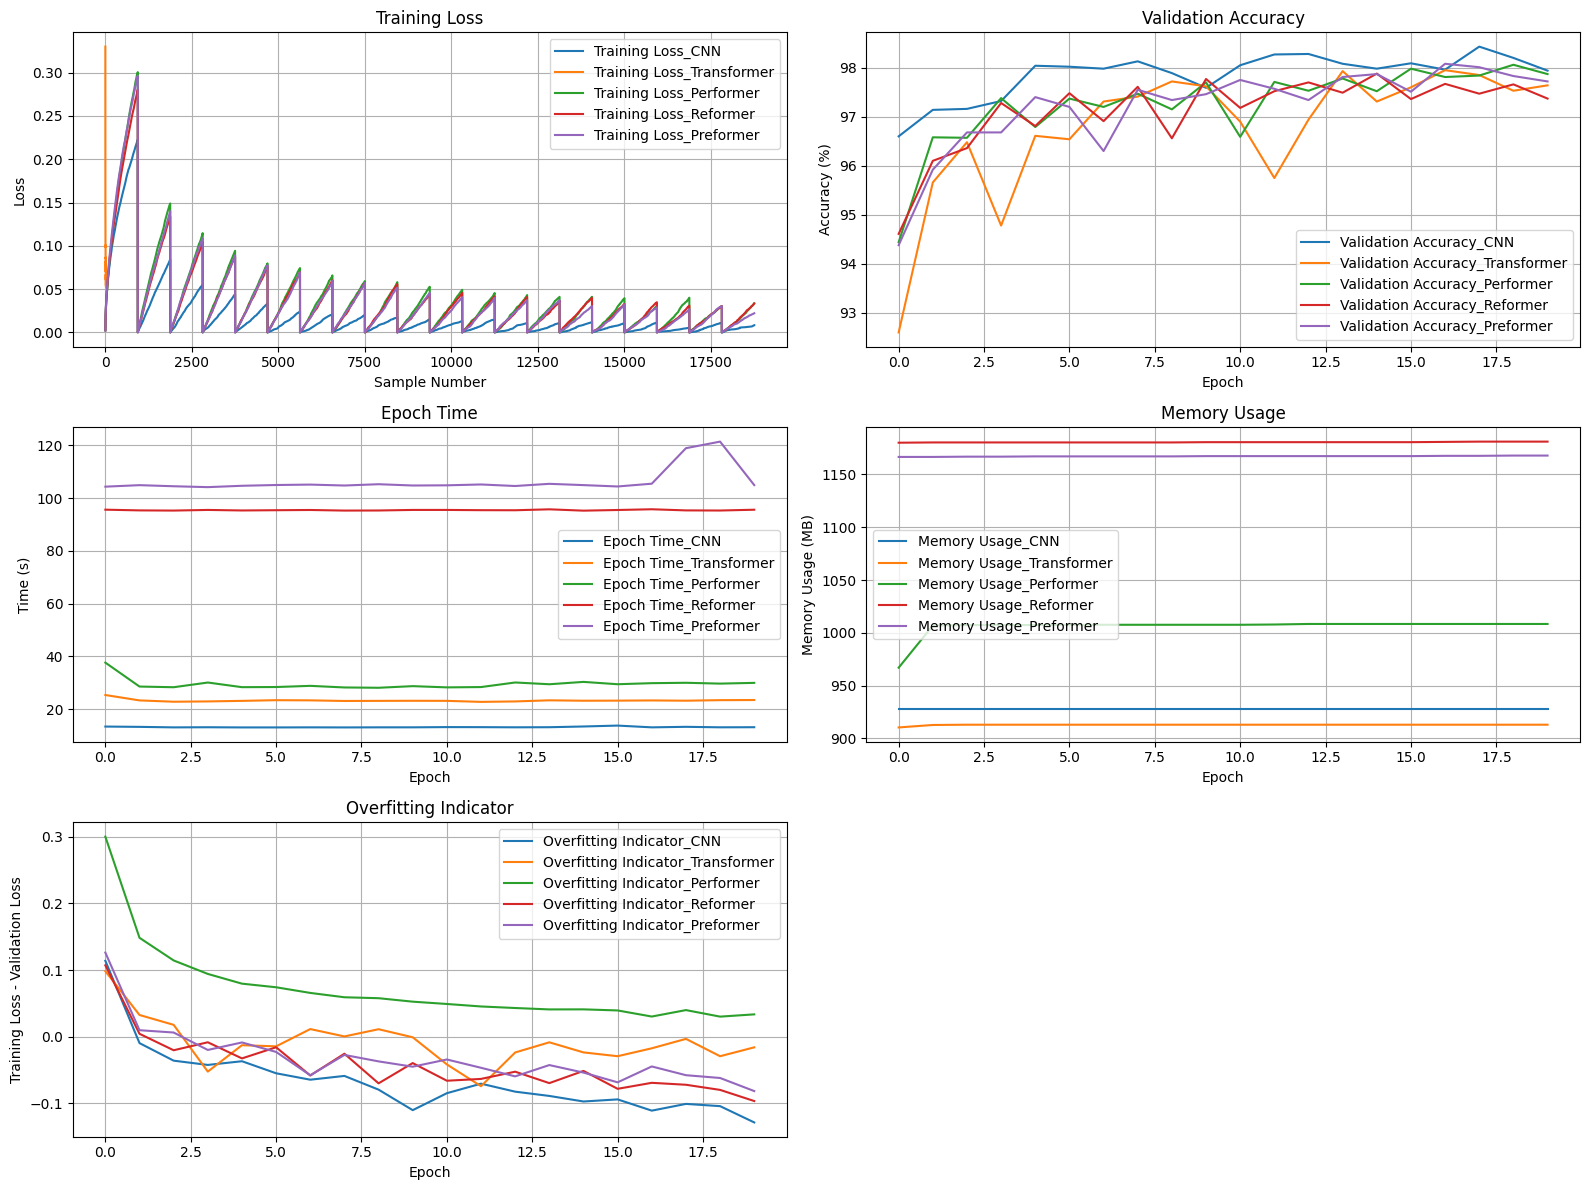

In [16]:
t1, v1, e1, m1, o1 = li0
t2, v2, e2, m2, o2 = li1
t3, v3, e3, m3, o3 = li2
t4, v4, e4, m4, o4 = li3
t5, v5, e5, m5, o5 = li4
# 손실값, 정확도, 시간 및 메모리 사용량 그래프 그리기
plt.figure(figsize=(16, 12))
plt.grid(True)
plt.subplot(3, 2, 1)
plt.plot(t2, label='Training Loss_CNN')
plt.plot(t1, label='Training Loss_Transformer')
plt.plot(t3, label='Training Loss_Performer')
plt.plot(t4, label='Training Loss_Reformer')
plt.plot(t5, label='Training Loss_Preformer')
plt.xlabel('Sample Number')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.title('Training Loss')

plt.subplot(3, 2, 2)
plt.plot(v2, label='Validation Accuracy_CNN')
plt.plot(v1, label='Validation Accuracy_Transformer')
plt.plot(v3, label='Validation Accuracy_Performer')
plt.plot(v4, label='Validation Accuracy_Reformer')
plt.plot(v5, label='Validation Accuracy_Preformer')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()
plt.title('Validation Accuracy')

plt.subplot(3, 2, 3)
plt.plot(e2, label='Epoch Time_CNN')
plt.plot(e1, label='Epoch Time_Transformer')
plt.plot(e3, label='Epoch Time_Performer')
plt.plot(e4, label='Epoch Time_Reformer')
plt.plot(e5, label='Epoch Time_Preformer')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Time (s)')
plt.legend()
plt.title('Epoch Time')

plt.subplot(3, 2, 4)
plt.plot(m2, label='Memory Usage_CNN')
plt.plot(m1, label='Memory Usage_Transformer')
plt.plot(m3, label='Memory Usage_Performer')
plt.plot(m4, label='Memory Usage_Reformer')
plt.plot(m5, label='Memory Usage_Preformer')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Memory Usage (MB)')
plt.legend()
plt.title('Memory Usage')

plt.subplot(3, 2, 5)
plt.plot(o2, label='Overfitting Indicator_CNN')
plt.plot(o1, label='Overfitting Indicator_Transformer')
plt.plot(o3, label='Overfitting Indicator_Performer')
plt.plot(o4, label='Overfitting Indicator_Reformer')
plt.plot(o5, label='Overfitting Indicator_Preformer')
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Training Loss - Validation Loss')
plt.legend()
plt.title('Overfitting Indicator')

plt.tight_layout()
plt.show()